In [1]:
import chess
import cv2 as cv
import matplotlib.pyplot as plt

from detectors.chess_pieces_detector import ChessPiecesDetector
from detectors.chessboard_detector import ChessboardDetector
from utils.drawing import draw_points

In [2]:
chess_pieces_detector = ChessPiecesDetector('models/chess_pieces.model.pt')


0: 416x416 2 black-bishops, 1 black-king, 3 black-knights, 6 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 74.5ms
Speed: 3.5ms preprocess, 74.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\predict20


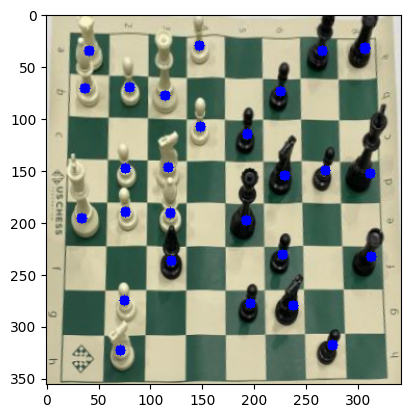

In [3]:
image_path = 'data/chess_pieces/test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg'
original_image = cv.imread(image_path, cv.IMREAD_COLOR)

chessboard_detector = ChessboardDetector(original_image)
chessboard_detector.detect()
chessboard_detector.transform_and_detect()
transformed_image = chessboard_detector.transform_and_detect()

results = chess_pieces_detector.detect(transformed_image)
result = results[0]
image_width = result.orig_shape[1]
image_height = result.orig_shape[0]

box_width = image_width / 8
box_height = image_height / 8

chess_pieces = ['.', 'b', 'k', 'n', 'p', 'q', 'r', 'B', 'K', 'N', 'P', 'Q', 'R']
piece_positions = []
points = []
for box in result.boxes:
    piece_type = chess_pieces[int(box.cls)]
    xmin, ymin, xmax, ymax = box.xyxy[0]
    x_middle = (xmin + xmax) / 2
    y_middle = ymax - (box_height / 2)

    point = (int(x_middle), int(y_middle))
    points.append(point)

    col = int(x_middle / box_width)
    row = int(y_middle / box_height)
    piece_positions.append((piece_type, (row, col)))

draw_points(transformed_image, points)

plt.imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))

In [4]:
piece_positions.sort(key=lambda x: (x[1][0], x[1][1]))

chessboard = [['.' for _ in range(8)] for _ in range(8)]

for piece_type, (row, col) in piece_positions:
    chessboard[row][col] = piece_type

fen_rows = []
for row in chessboard:
    fen_row = ''
    empty_count = 0
    for square in row:
        if square == '.':
            empty_count += 1
        else:
            if empty_count > 0:
                fen_row += str(empty_count)
                empty_count = 0
            fen_row += square
    if empty_count > 0:
        fen_row += str(empty_count)
    fen_rows.append(fen_row)

fen = '/'.join(fen_rows)

print("FEN:", fen)

FEN: R2P2bn/BPQ2p2/3Pp3/1PN2npk/KPB1q3/2b2p1r/1P2pn2/1N4p1


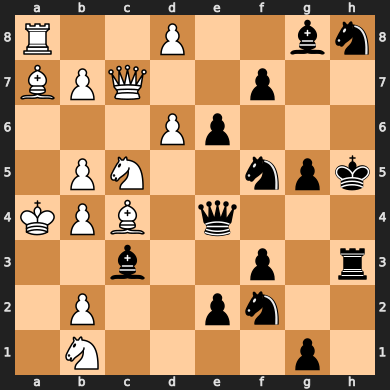

In [5]:
chess.Board(fen)

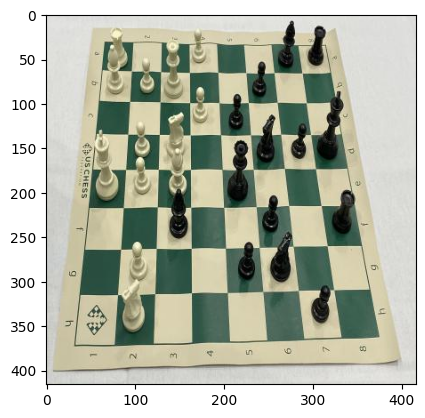

In [6]:
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))